# Assignment #4 - Neural Networks

### <font color="red"> DUE: Nov 16 (Thursday) 11:00 pm </font>  

<font color="blue"> Benjamin Daniel Poole </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# I. Overview

The goal of this assignment is to utilize my regression data set, Appliances Energy Prediction, in accordance with a neural network to predict the appliances total energy usage based on different features of a home. These features will be further described in the Data section followed by the Method section which contains my k-cross validation. Methods is followed by the Results section which compares the top 3-cross validation parameters and partitions followed by my concluding thoughts.

# II. Data


## Regression: Appliances Energy Prediction Data Set 

The goal of this data set is to predict appliances energy usage in a home. This dataset contains 19735 samples with 25 base features (27 including random variable features) relating to the temperature/humidity of different rooms, outside weather factors and the energy use of light fixtures in the house (see features). Every row corresponds to 10 mins of data gathered over 4.5 months for a single house in Belgium.

 #### Features
- Appliances, energy use in Wh **TARGET**
- lights, energy use of light fixtures in the house in Wh <br>
- T1, Temperature in kitchen area, in Celsius <br>
- RH_1, Humidity in kitchen area, in % <br>
- T2, Temperature in living room area, in Celsius <br>
- RH_2, Humidity in living room area, in % <br>
- T3, Temperature in laundry room area <br>
- RH_3, Humidity in laundry room area, in %<br> 
- T4, Temperature in office room, in Celsius <br>
- RH_4, Humidity in office room, in % <br>
- T5, Temperature in bathroom, in Celsius <br>
- RH_5, Humidity in bathroom, in % <br>
- T6, Temperature outside the building (north side), in Celsius<br> 
- RH_6, Humidity outside the building (north side), in % <br>
- T7, Temperature in ironing room , in Celsius <br>
- RH_7, Humidity in ironing room, in % <br>
- T8, Temperature in teenager room 2, in Celsius <br>
- RH_8, Humidity in teenager room 2, in % <br>
- T9, Temperature in parents room, in Celsius <br>
- RH_9, Humidity in parents room, in % <br>
- To, Temperature outside (from Chievres weather station), in Celsius <br>
- Pressure (from Chievres weather station), in mm Hg <br>
- RH_out, Humidity outside (from Chievres weather station), in % <br>
- Wind speed (from Chievres weather station), in m/s <br>
- Visibility (from Chievres weather station), in km <br>
- Tdewpoint (from Chievres weather station), Â°C <br>

[Data Link](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction)

 ### Preprocessing
 Since my data is built for linear regression I must manually create my target based on the rules stated above. Once I have my target I will have to create multiple ways of representing said target, since each algorithm takes a different target structure. It is also important to note that I will be randomizing all my data based on a random seed.

In [2]:
# Preprocessin
df_class = pd.read_csv("regress_data.csv")
df_class_rd = df_class.drop(['date'],1) # With random values for regression (provided by dataset authors)
df_class = df_class.drop(['date', 'rv1', 'rv2'],1) # Without random values for regression (provided by dataset authors)
target = df_class['Appliances'] # Get target
df_data = df_class.drop('Appliances',1) # drop the actual appliance energy usuage
data = df_data.values # Get dataset

# Randomize Data
rng_prem = np.random.RandomState(seed=42).permutation(len(data))
data = data[rng_prem]
target = target[rng_prem].values # randomize and remove counter

print("Target", target.shape)
print("Data:", data.shape)

# Partition data
partition = int(len(data) * .8)

# Train
train_data = data[:partition]
train_target = target[:partition]

# Test
test_data =  data[partition:]
test_target = target[partition:]


Target (19735,)
Data: (19735, 25)


In [3]:
df_class

Appliances  lights         T1       RH_1         T2       RH_2  \
0              60      30  19.890000  47.596667  19.200000  44.790000   
1              60      30  19.890000  46.693333  19.200000  44.722500   
2              50      30  19.890000  46.300000  19.200000  44.626667   
3              50      40  19.890000  46.066667  19.200000  44.590000   
4              60      40  19.890000  46.333333  19.200000  44.530000   
5              50      40  19.890000  46.026667  19.200000  44.500000   
6              60      50  19.890000  45.766667  19.200000  44.500000   
7              60      50  19.856667  45.560000  19.200000  44.500000   
8              60      40  19.790000  45.597500  19.200000  44.433333   
9              70      40  19.856667  46.090000  19.230000  44.400000   
10            230      70  19.926667  45.863333  19.356667  44.400000   
11            580      60  20.066667  46.396667  19.426667  44.400000   
12            430      50  20.133333  48.000000  19.566667  44.400000   
13            250      40  20.260000  52.726667  19.730000  45.100000   
14            100      10  20.426667  55.893333  19.856667  45.833333   
15            100      10  20.566667  53.893333  20.033333  46.756667   
16             90      10  20.730000  52.660000  20.166667  47.223333   
17             70      30  20.856667  53.660000  20.200000  47.056667   
18             80      30  20.890000  51.193333  20.200000  46.330000   
19            140      40  20.890000  49.800000  20.200000  46.026667   
20            120      20  20.890000  48.433333  20.200000  45.722500   
21            190      40  20.963333  47.633333  20.260000  45.530000   
22            110      40  21.033333  47.063333  20.290000  45.223333   
23            110      40  21.100000  46.596667  20.356667  44.963333   
24            110      30  21.133333  46.060000  20.426667  44.760000   
25            110      20  21.200000  45.800000  20.500000  44.760000   
26            100      30  21.290000  45.900000  20.533333  45.090000   
27            100      20  21.356667  45.826667  20.666667  45.163333   
28            100      20  21.390000  45.690000  20.700000  45.060000   
29            100      20  21.500000  45.333333  20.700000  44.933333   
...           ...     ...        ...        ...        ...        ...   
19705         280       0  25.033333  48.363333  26.528571  40.595714   
19706         240       0  25.166667  48.156667  26.600000  40.940000   
19707         250       0  25.323333  47.930000  26.600000  41.012857   
19708         220       0  25.390000  47.656667  26.600000  41.036000   
19709         230       0  25.500000  47.133333  26.600000  41.000000   
19710         190      10  25.500000  47.060000  26.540000  41.000000   
19711         160       0  25.600000  46.990000  26.512500  41.203750   
19712          80       0  25.600000  46.730000  26.437143  41.384286   
19713          60       0  25.566667  46.633333  26.370000  41.378000   
19714          60       0  25.500000  46.360000  26.318571  41.264286   
19715          60       0  25.500000  46.060000  26.350000  41.000000   
19716          60       0  25.500000  45.933333  26.277143  41.000000   
19717          70       0  25.500000  45.760000  26.200000  41.000000   
19718          80       0  25.500000  45.626667  26.171429  41.000000   
19719          80       0  25.500000  45.590000  26.100000  41.000000   
19720          70       0  25.500000  45.522500  26.100000  41.051429   
19721         100       0  25.500000  45.633333  26.080000  41.196000   
19722         100       0  25.500000  45.730000  26.000000  41.428571   
19723          90       0  25.500000  45.790000  26.000000  41.590000   
19724         100       0  25.500000  45.933333  26.000000  41.652857   
19725         220       0  25.426667  46.060000  26.000000  41.700000   
19726         180       0  25.500000  46.530000  26.000000  41.725714   
19727         120       0  25.500000  47.456667  26.000000  42.32

### Visualization

**Appliances Energy Usuage**: Here we can see the energy usuage of the Appliances in Wh. This graph makes it hard to really see what is happening.

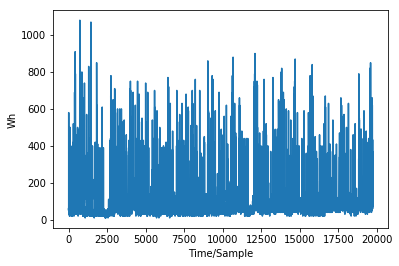

In [4]:
plt.plot(df_class.iloc[:,0])
plt.xlabel("Time/Sample")
plt.ylabel("Wh");

**Appliances Energy Usuage**:Below we can see how many times each Wh value occurred over the 4.5 months. As we can see 50 and 60 Wh occured the most and can assume our mean appliance usuage should be around 50-60 Wh.

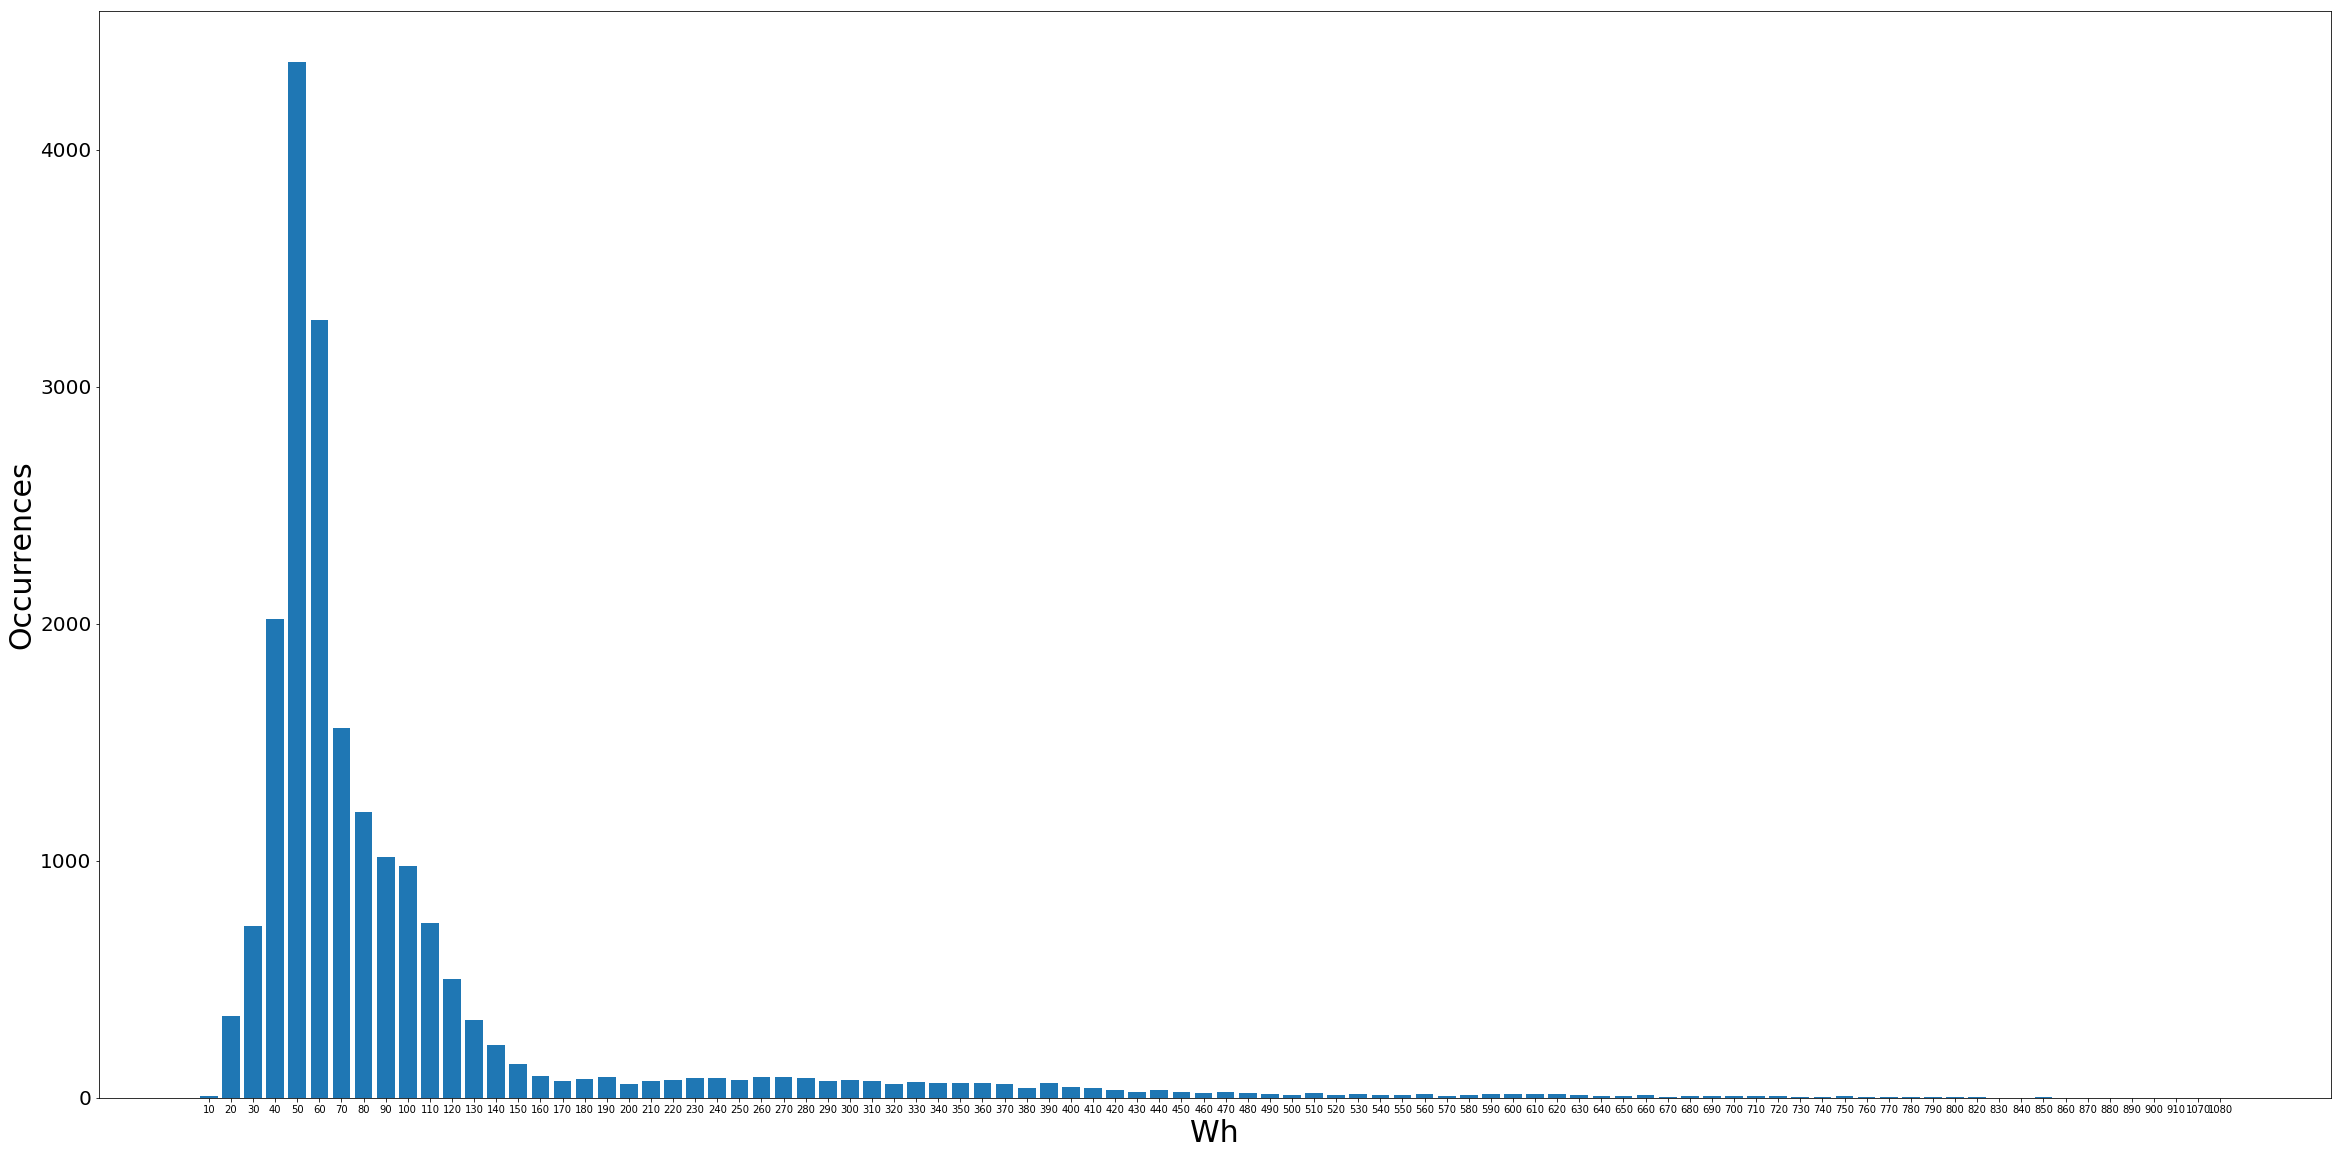

In [5]:
app = df_class.iloc[:,0].values
count = np.unique(app, return_counts=True)
fig, ax = plt.subplots(1,1, figsize=(40,20))
ax.bar(range(0, 92),count[1], tick_label =count[0])
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel("Wh",  fontsize=30)
ax.set_ylabel("Occurrences", fontsize=30)
plt.show()

**Room Temperatures** Here we can see a linear trend in the increase in temperature over time in all rooms of the house. This is most likely due to increase in temperature outside over the 4.5 months. Meaning, that the tests began in April and lasted around five months, therefore ending around August/September, in other words the end of summer (summer tends to end around the end of September in Belgium).

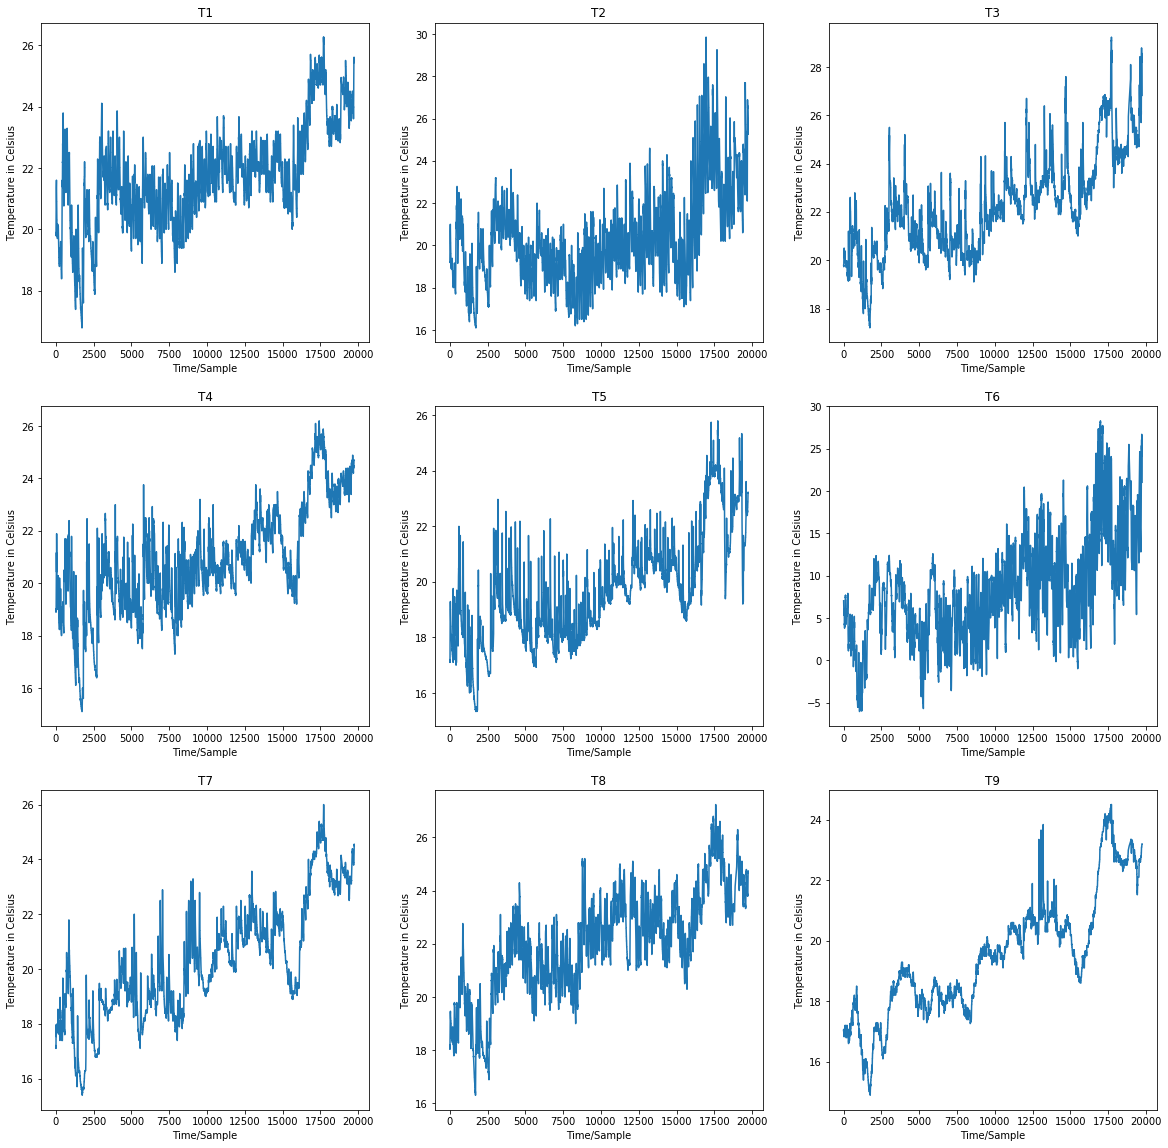

In [6]:
ax = []
fig, ax = plt.subplots(3,3, figsize=(20,20))
ax = ax.flatten()
for i in range(len(ax)):
    loc = "T" + str(i+1)
    ax[i].plot(df_class.loc[:,loc])
    ax[i].set_title('T' + str(i+1))
    ax[i].set_xlabel("Time/Sample")
    ax[i].set_ylabel("Temperature in Celsius")
plt.show()

**Room Humidity** Here it is much harder to tell if there is a trend. If we take a carful look we can see a negative to neutral trend in humidity over time in almost all the rooms. As summer comes to an end the humidity in the rooms decreases depending on the rooms location. The room with the most neutral trend is the bathroom or RH_5. While the location with the most apparent negative trend is outside or RH_6.

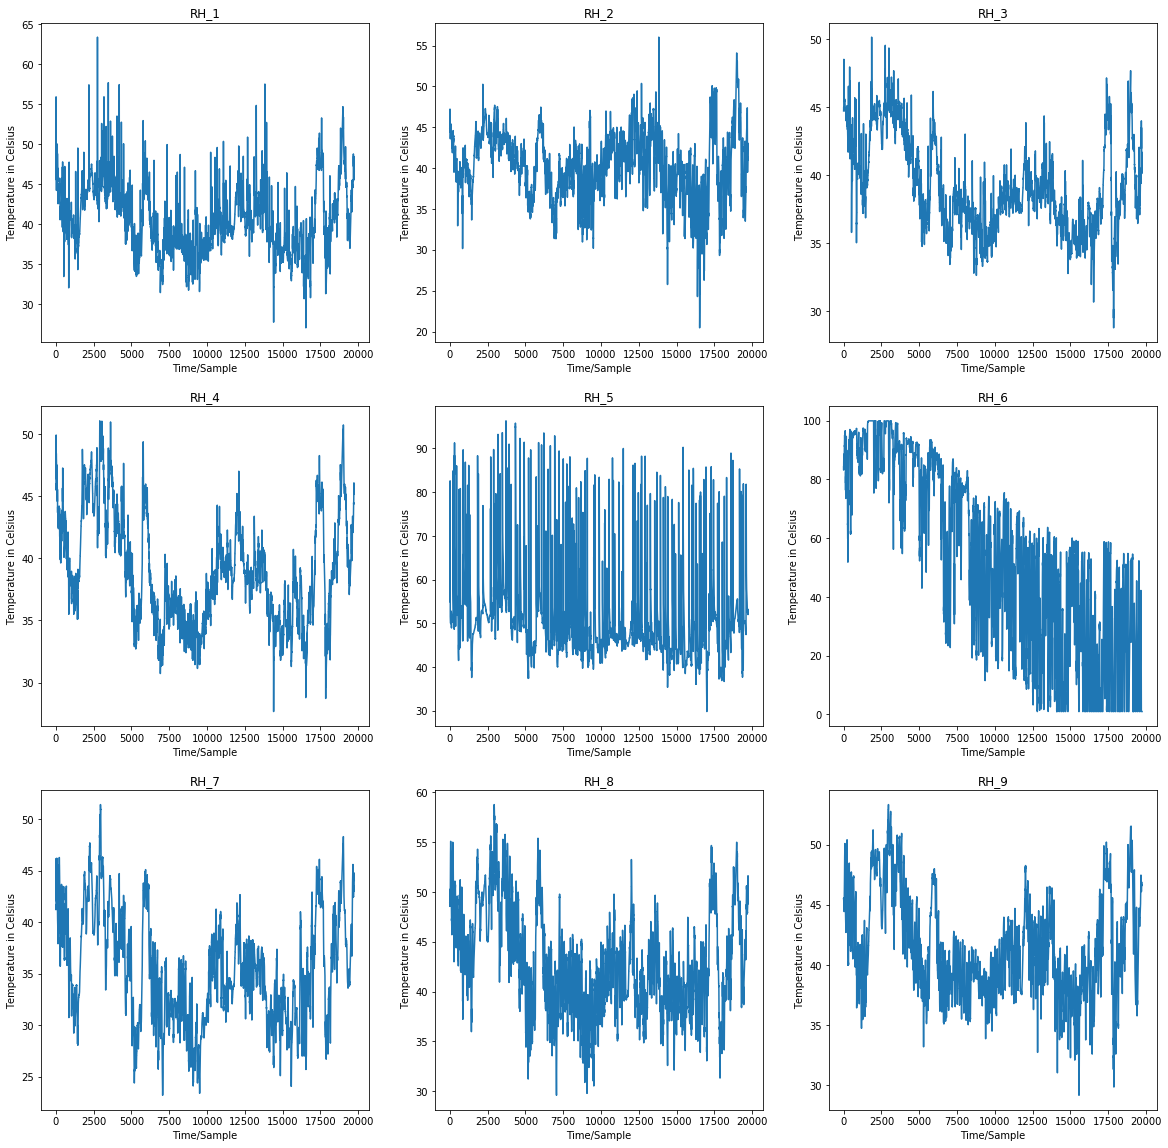

In [7]:
ax = []
fig, ax = plt.subplots(3,3, figsize=(20,20))
ax = ax.flatten()
for i in range(len(ax)):
    loc = "RH_" + str(i+1)
    ax[i].plot(df_class.loc[:,loc])
    ax[i].set_title('RH_' + str(i+1))
    ax[i].set_xlabel("Time/Sample")
    ax[i].set_ylabel("Temperature in Celsius")
plt.show()

### Preliminary Observations Summary

As you can see from the above observations, my data seems to be following linear trends. Depending on the feature the linear trends may be strong or weak and positive or negatively related. Lastly, we can see that the average value of the energy usage should be around 50-60 Wh.

# III. Methods


## Neural Networks - Logistic Regression

A neural network is loosely inspired by how the brain functions. A neural network tries to stack layers of neurons called hidden units in order to create complex interaction that tend to be nonlinear. These complex interactions can be linear when no activation functions are applied but I digress. Given a 1-layer neural network (1 hidden layer), let's break down what is happening and how the network works. When the neural network receives inputs, it maps these inputs to the first hidden layer by fully connecting each input to each hidden unit in the hidden layer. The weights, the connections between the input and hidden unit, are then summed at each hidden unit and then an activation function is applied to constrain the hidden unit’s value. If the hidden unit is above some threshold it is said to be active (on) otherwise it is inactive (off).  These hidden units in the first hidden layer are then mapped to an output where the same process repeats but an activation function is now only applied when utilizing logistic regression (nonlinear regression doesn’t use an activation function in the output layer). <br><br>
The most important part of a neural network are the weights. The weights are what determines the output of the network and are the parameters the network is attempting to learn. The workhorse behind the updating of the weights is backpropagation. Backpropagation works by optimizing the given error function using an optimization method such as gradient decent. The error essentially is propagated from the output layer back through the network where all the weights are slightly updated in correspondence to said error. Weights near the output layer tend to be more task specific while layers near the input tend to be more generalized due to more significant changes in weights taking place near the output layer.


The Run_Net class if made specifically for running Dr. Lee's neural network class. The batch_train method works by applying batch training to train the neural network, while doing so it also tracks the time it takes to successfully train the network. It is important to note that batch_train does not preform multiple passes over the training data (aka 1 epoch only). The batch_train method has a sub-method called fetch_batch that is used to get the next batch of data. Lastly, we have the test method with is used to test the neural network. 

In [8]:
from Neural_Net import NeuralNet
class Run_Net:
    def __init__(self, x, y, x_test, y_test, nn_struct, bs=1):
        if bs > len(x):
            raise Exception("Batch size greater than data size")
        self.x = x
        self.y = y
        self.x_test = x_test
        self.y_test = y_test
        self.bs = bs
        self.x_dims = x.shape[1]
        try:
            self.y_dims = y.shape[1]
        except  IndexError:
            self.y_dims = 1
        self.nn = NeuralNet(nn_struct)
        
    def batch_train(self,):
        
        def fetch_batch(bs, batch):
            start = bs * batch
            end = start + bs
            x_batch = self.x[start:end, :].reshape(bs, self.x_dims)
            y_batch = self.y[start:end].reshape(bs, self.y_dims)

            return x_batch, y_batch, [start, end]
            
        len_x = int(len(self.x) / self.bs)
        start = time.time()
        for batch in range(len_x):
            hours, rem = divmod(time.time()-start, 3600)
            minutes, seconds = divmod(rem, 60)
            cur_time = "{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds)
            print("Batch: {}/{} Time: {}".format(batch+1, len_x, cur_time), end="\r")
            
            x_batch, y_batch, locs = fetch_batch(bs=self.bs, batch=batch)
            self.nn.train(X=x_batch, T=y_batch)
        
        if len(self.x) % self.bs:
            end = locs[1]
            bs = len(self.x[end:, :])
            x_batch = self.x[end:, :].reshape(bs, self.x_dims)
            y_batch = self.y[end:].reshape(bs, self.y_dims)
            self.nn.train(X=x_batch, T=y_batch)
            
    def test(self,):
        Y, z = self.nn.use(self.x_test, retZ=True)
        #Y = abs(Y)
        loss =  np.sqrt(np.sum((Y-self.y_test)**2))
        return Y, z, loss
    

The standardize and normalize are helper functions that constrain my data before I feed it to the neural network. The standardize function simply constrains the data between -1 and 1. The normalize function constrains the data to 0 and 1 by default but can also constrain data within a given range.

In [15]:
def standardize(X):
    """ standardize the input X """
    meanX = np.mean(X, 0)
    stdX = np.std(X, 0)
    Xs = (X - meanX) / stdX
    return Xs

def normalize(X, r=[0,1]):
    norm = (X - np.min(X, axis=0)) / (np.max(X,axis=0) - np.min(X,axis=0))
    diff = r[1] - r[0]
    norm = (norm*diff) + r[0]
    return norm

### Preliminary Test of Neural Network

Below I have conducted a short preliminary test to make sure the neural network is working. I have arbitrarily selected a structure for the neural network and have partitioned my data into 80/20 (train/test). As we can see my loss is relatively high and the network has a hard time matching the target (observed in graph below). As we will see, a big issue is that the network predicts negative values even though we can never have negative appliance energy values.

In [10]:
r=[0,8] # normalize between a range of numbers
norm_data = normalize(train_data,r)
norm_target = normalize(train_target.reshape(-1,1),r)
test_norm_data = normalize(test_data,r)
test_norm_target = normalize(test_target.reshape(-1,1),r)

run = Run_Net(norm_data, norm_target, test_norm_data, test_norm_target, [25,10,10,10,1], bs=512)
run.batch_train()
Y, _, loss = run.test()

<function matplotlib.pyplot.show>

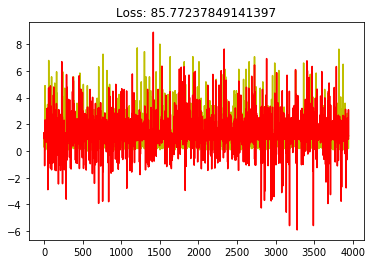

In [11]:
# Actual (yellow) vs Test (red)
plt.title("Loss: {}".format(loss) )
plt.plot(test_norm_target, '-y')
plt.plot(Y, '-r')
plt.show

## K-Cross Validation

K-cross validation works by splitting your data and target datasets into k partitions. In my case, if my data does not evenly split into k partitions I modular the length of the data by k to find the leftovers. I then subtract the leftovers from the total data and target datasets to get an even split. Once you have split your data you can begin using each partition as a test, valid and train dataset. In doing so you test all the different combinations in order to find the optimal results (lowest loss or highest accuracy). K-cross validation goes beyond simply observing which data partitions are optimal, it also tests which parameters are optimal. In my k-cross validation I am testing which neural network structures, from a select group of structures, will perform the best with all the different partition combinations. K-cross validation can take a very long time to run but at the end of the day it can give you optimal results. You can think of k-cross validation as a simplified auto-ml algorithm in some regards. <br>

 I use the following neural networks structures based on randomness, a priori, time constraints, and experimentation: [25,5,1], [25,10,10,1], [25,10,1], [25,15,1], [25,10,5,1], [25,30,1]

In [12]:
def kcross_valid(k, x, y, net_structs):
    if len(x) % k:
        leftover = len(x) % k
        end = len(x) -leftover
        print("REDUCED DATA USED FROM {} TO {} FOR EVEN SPLIT!".format(len(x), len(x[:end])))
        x = x[:end]
        y = y[:end]
    x_split = np.split(x, k) # split data into partitions
    y_split = np.split(y, k) # split data into partitions
    best_struct = None
    test_losses = []
    test_structs = []
    test_preds = []

    for i in range(k): # Run Test partition
        print("TEST TARGET:", i, y_split[i].shape)
        x_test = x_split[i] # extract test data
        y_test = y_split[i] # extract test target
        losses = [] # Stores top validation losses
        structs = [] # Stores top validation structs
    
        for v in range(k): # Run Validation partition
            if v == i:
                continue 
            print("--VALIDATION TARGET", v, y_split[v].shape)
            x_valid = x_split[v] # extract validation data
            y_valid = y_split[v] # extract validation target
            print("---Validation Data:", x_valid.shape)
            print("---Validation Target:", y_valid.shape)


            x_train = np.vstack([x for c,x in enumerate(x_split) if c!=v and c!=i]) # Stack data that isn't test or validation
            y_train = np.vstack([x for c,x in enumerate(y_split) if c!=v and c!=i]) # Stack targets that aren't test or validation
            print("----Test Data", x_train.shape)
            print("----Train Target", y_train.shape)

            for struct in net_structs: # try different neural net structures
                run = Run_Net(x_train, y_train, x_valid, y_valid, struct, bs=512) # init run_net
                run.batch_train() # train
                _, _, loss = run.test() # test
                print("\nStruct Used: ",struct, end='\n')
                losses.append(loss) # track loss
                structs.append(struct) # track structs corresponding to loss
                
        top_idx = np.argmin(losses) # extract lowest loss after validation trials
        best_struct =  structs[top_idx] # extract best struct
        print("Best Result:", int(losses[top_idx]), best_struct)
    
        x_train = np.concatenate((x_train, x_valid),axis=0) # combine train and valid data
        y_train = np.concatenate((y_train, y_valid.reshape(-1, 1)),axis=0) # combine train and valid target
        print("Test Train Data", x_train.shape)
        print("Test Train Target", y_train.shape)
        run = Run_Net(x_train, y_train, x_test, y_test, best_struct, bs=512) # init run_net
        run.batch_train() # train
        pred, _, loss = run.test() # test
        test_losses.append(loss) # track loss
        test_structs.append(best_struct) # track structs
        test_preds.append(pred) # track preds

    return test_losses, test_structs, test_preds, x_split, y_split

In [26]:
# run k-cross validation
net_structs = [[25,5,1], [25,10,10,1], [25,10,1], [25,15,1], [25,10,5,1], [25,30,1]]
r=[0,8]
k=3
norm_data = normalize(data, r)
norm_target = normalize(target, r)
test_losses, test_structs, test_preds, split_data, split_target = kcross_valid(k, norm_data, norm_target.reshape(-1,1), net_structs)

REDUCED DATA USED FROM 19735 TO 19734 FOR EVEN SPLIT!
TEST TARGET: 0 (6578, 1)
--VALIDATION TARGET 1 (6578, 1)
---Validation Data: (6578, 25)
---Validation Target: (6578, 1)
----Test Data (6578, 25)
----Train Target (6578, 1)
Batch: 12/12 Time: 00:00:06.29
Struct Used:  [25, 5, 1]
Batch: 12/12 Time: 00:00:14.46
Struct Used:  [25, 10, 10, 1]
Batch: 12/12 Time: 00:00:08.78
Struct Used:  [25, 10, 1]
Batch: 12/12 Time: 00:00:10.63
Struct Used:  [25, 15, 1]
Batch: 12/12 Time: 00:00:12.57
Struct Used:  [25, 10, 5, 1]
Batch: 12/12 Time: 00:00:16.46
Struct Used:  [25, 30, 1]
--VALIDATION TARGET 2 (6578, 1)
---Validation Data: (6578, 25)
---Validation Target: (6578, 1)
----Test Data (6578, 25)
----Train Target (6578, 1)
Batch: 12/12 Time: 00:00:05.82
Struct Used:  [25, 5, 1]
Batch: 12/12 Time: 00:00:14.81
Struct Used:  [25, 10, 10, 1]
Batch: 12/12 Time: 00:00:08.15
Struct Used:  [25, 10, 1]
Batch: 12/12 Time: 00:00:10.63
Struct Used:  [25, 15, 1]
Batch: 12/12 Time: 00:00:12.80
Struct Used:  [25

# IV - Results

Below I will quickly discuss my results from the k-cross validation and retrain said optimal k-cross results.

## 3-Cross Validation Results

Below are my results from running 3-cross validation. As we can see the losses are relatively close, but the prediction patterns for each chosen structure are relatively diverse. The structure [25,15,1] picked up two top loss spots and while the [25,5,1] structure picked up a top spot with an erratic prediction pattern. The middle [25,15,1] structure seems to be the most general model (attempts to capture normal energy usage) and preforms the best because it makes no negative predictions.

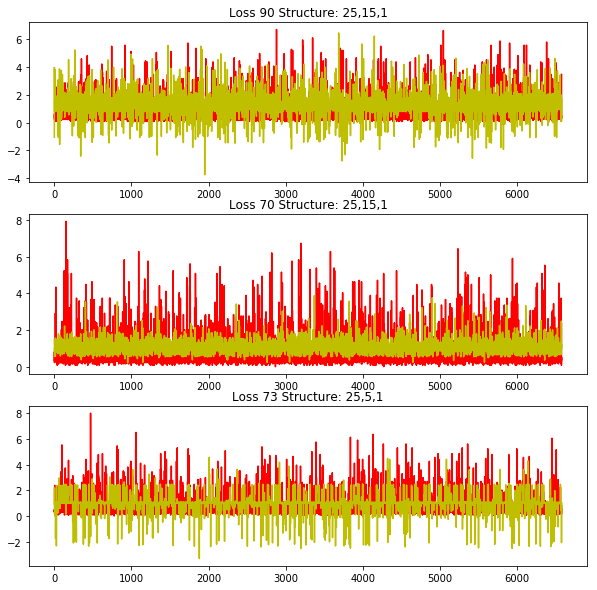

In [27]:
axs = []
fig, axs = plt.subplots(k, figsize=(10,10))

for ax in range(len(axs)):
    str_struct = ",".join(str(x) for x in test_structs[ax])
    title = "Loss {} Structure: {}".format(int(test_losses[ax]), str_struct)
    axs[ax].set_title(title)
    axs[ax].plot(split_target[ax], '-r')
    axs[ax].plot(test_preds[ax], '-y')
    
plt.show()

## Neurel Net  Structures Retrained Discussion


### Parameter/Network Structure Choice
Below I have extracted out the best structures and partitions. Using the best structures and partitions I will retrain my neural network and see if I can replicate the results received in k-cross validation. From manual testing I have found that around a 512-batch size seems to perform the best, therefore, it was used in the k-cross implementation and here. I simply left the alpha (learning rate) at its default value because it also seemed to preform relatively well too. Lastly, I chose a k of 3 simply to keep the running time of k-cross validation low. <br><br>
The most interesting parameter choices I made were for the structure. As I previously mentioned I used the following neural networks structures based on randomness, a priori, time constraints, and experimentation: [25,5,1], [25,10,10,1], [25,10,1], [25,15,1], [25,10,5,1], [25,30,1]. I also decided on these structures after running multiple k-cross validations that had a higher number of layers and hidden units. Though, from my experimentation, fewer layers and fewer hidden units seem to perform the best.

### Retrained Prediction Results 

#### Top Structure

As we can the [25,15,1] structure seemed to make relatively tamed predictions with no negative predictions, which is good! We can see though that it made no 0 predictions and tried to predict the spikes in energy usage but in this regard performed poorly. The main issue it seems is the lack of energy spike predictions.

In [28]:
tmp_test_losses = test_losses[:]

In [29]:
test_idx = np.argmin(tmp_test_losses) # extract best loss
tmp_test_losses[test_idx] = float("inf") # set min loss to infinity, so that it cant be used again
best_struct = test_structs[test_idx] # extract best structure
train_data = np.vstack([x for i,x in enumerate(split_data) if test_idx!=i])
train_target = np.vstack([x for i,x in enumerate(split_target) if test_idx!=i])

test_data = split_data[test_idx]
test_target = split_target[test_idx]

In [30]:
print("Best Structure:", best_struct)
print("Best Parition: Test set #{} out of {}, Test {}, Train {}".format(test_idx+1, k, test_data.shape, train_data.shape))

Best Structure: [25, 15, 1]
Best Parition: Test set #2 out of 3, Test (6578, 25), Train (13156, 25)


In [31]:
run = Run_Net(train_data, train_target, test_data, test_target, best_struct, bs=512)
run.batch_train()
nn_Y, _, nn_loss = run.test()

<function matplotlib.pyplot.show>

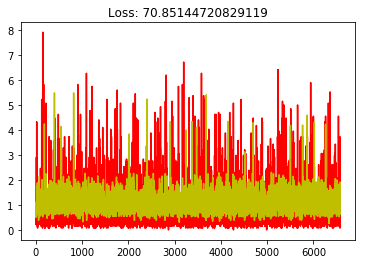

In [32]:
# Actual (yellow) vs Test (red)
plt.title("Loss: {}".format(nn_loss))
plt.plot(test_target, '-r')
plt.plot(nn_Y, '-y')
plt.show

#### Second Best Structure

As we can see the second-best structure [25,5,1] actually outperformed the top structure when we retrained it. This structure seemed to attempt to predict energy spikes more than the previous. The main issue here is that the energy spikes predicted were not intense enough.

In [33]:
test_idx = np.argmin(tmp_test_losses) # extract the next best loss
tmp_test_losses[test_idx] = float("inf") # set min loss to infinity, so that it cant be used again
sec_best_struct = test_structs[test_idx] # extract best structure
train_data = np.vstack([x for i,x in enumerate(split_data) if test_idx!=i])
train_target = np.vstack([x for i,x in enumerate(split_target) if test_idx!=i])

test_data = split_data[test_idx]
test_target = split_target[test_idx]

In [34]:
print("Second Best Structure:", sec_best_struct)
print("Second Best Parition: Test set #{} out of {}, Test {}, Train {}".format(test_idx+1, k, test_data.shape, train_data.shape))

Second Best Structure: [25, 5, 1]
Second Best Parition: Test set #3 out of 3, Test (6578, 25), Train (13156, 25)


In [35]:
run = Run_Net(train_data, train_target, test_data, test_target, best_struct, bs=512)
run.batch_train()
nn_Y, _, nn_loss = run.test()

<function matplotlib.pyplot.show>

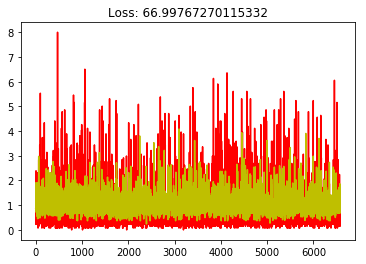

In [36]:
# Actual (yellow) vs Test (red)
plt.title("Loss: {}".format(nn_loss))
plt.plot(test_target, '-r')
plt.plot(nn_Y, '-y')
plt.show

#### Third Best Structure

Lastly, we retain the [25,15,1] structure again since it received the third lowest loss. As we can see it preformed even worse than the previous two models. The structure seemed to over predict energy usage spikes and had negative energy predictions which contributed to its poor performance.

In [37]:
test_idx = np.argmin(tmp_test_losses) # extract the next best loss
tmp_test_losses[test_idx] = float("inf") # set min loss to infinity, so that it cant be used again
third_best_struct = test_structs[test_idx] # extract best structure
train_data = np.vstack([x for i,x in enumerate(split_data) if test_idx!=i])
train_target = np.vstack([x for i,x in enumerate(split_target) if test_idx!=i])

test_data = split_data[test_idx]
test_target = split_target[test_idx]

In [38]:
print("Third Best Structure:", third_best_struct)
print("Third Best Parition: Test set #{} out of {}, Test {}, Train {}".format(test_idx+1, k, test_data.shape, train_data.shape))

Third Best Structure: [25, 15, 1]
Third Best Parition: Test set #1 out of 3, Test (6578, 25), Train (13156, 25)


In [39]:
run = Run_Net(train_data, train_target, test_data, test_target, best_struct, bs=512)
run.batch_train()
nn_Y, _, nn_loss = run.test()

<function matplotlib.pyplot.show>

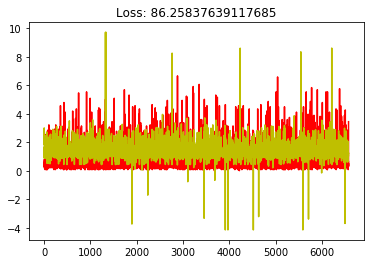

In [40]:
# Actual (yellow) vs Test (red)
plt.title("Loss: {}".format(nn_loss))
plt.plot(test_target, '-r')
plt.plot(nn_Y, '-y')
plt.show

## Results Conclusion

For the most part all the structures predicted the general energy usage but were unable to reliably predict energy usage spikes. To my surprise the actual best preforming model was the model with the smallest number of hidden units ([25,5,1]), which did not match my k-cross validation results. The [25,5,1] structure seemed to predict the energy spikes the best on the retrained model while the k-cross validation model of [25,5,1] seemed to preform erratic predictions that included negative values. I believe I can receive better results if I added convergence checks with multiple epochs of training on each structure, due to time restraints I was unable to do this.

([<matplotlib.axis.XTick at 0x2e0016fdfd0>,
 <a list of 3 Text xticklabel objects>)

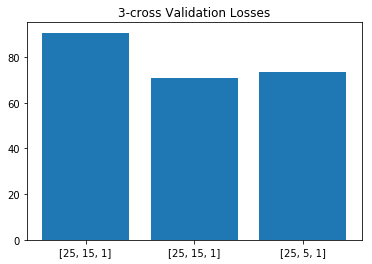

In [56]:
x = np.arange(k)

plt.bar(x, test_losses)
plt.title(str(k)+"-cross Validation Losses")
plt.xticks(x, test_structs)

# Conclusions

This assignment was definitely the easiest out of all four assignments. The one area where I got hung up was understanding the input into the neural network class. Once I understood this it was relatively easy sailing to construct k-cross validation and put together my results. Sadly, I did not have any time to complete the bonus but working with TensorFlow is always fun!

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
45 | Methods | 
 |10| Summary of Neural Networks
 | 5| Explanation of codes
 |10| Examination of correct implementation with preliminary test with *explanation (5 pts)*
 |20| Cross validation codes and explanation 
35 | Results | Your Data
| 10| plots for results
| 15| Discussions about parameter/network structure choice 
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
